In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

In [25]:
# Muat dataset dari file CSV
df = pd.read_csv('heart.csv')

# --- Langkah Baru: Tangani nilai '?' ---
# Ganti semua nilai '?' dengan NaN (Not a Number) agar bisa diproses
import numpy as np
df = df.replace('?', np.nan)

# Hapus kolom yang tidak relevan untuk prediksi
df = df.drop(columns=['id', 'dataset'])

# --- Proses Konversi Data Teks ke Angka ---

# Ubah 'Male'/'Female' menjadi 1/0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Ubah TRUE/FALSE menjadi 1/0
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

# Ubah kolom kategorikal lain menjadi angka menggunakan one-hot encoding
df = pd.get_dummies(df, columns=['cp', 'slope', 'thal'], drop_first=True)

# --- Langkah Baru: Konversi semua kolom ke tipe numerik dan isi nilai yang hilang ---
# Konversi semua kolom menjadi angka, paksa nilai yang tidak bisa diubah menjadi NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Isi setiap nilai NaN dengan nilai median (nilai tengah) dari kolomnya masing-masing
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())


# Definisikan target (y) dan ubah menjadi biner (0 = tidak sakit, 1 = sakit)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Definisikan fitur (X) dengan membuang kolom target asli
X = df.drop('num', axis=1)

# Tampilkan informasi untuk verifikasi bahwa tidak ada lagi nilai null
print("Data setelah diproses dan dibersihkan:")
display(X.head())
print("\nVerifikasi nilai kosong (semua harus False):")
print(X.isnull().any())

Data setelah diproses dan dibersihkan:


d:\Datmi\Flask\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1.0,NaN,150.0,0.0,2.3,0.0,False,False,True,False,False,False,False
1,67,1,160.0,286.0,0.0,NaN,108.0,1.0,1.5,3.0,False,False,False,True,False,True,False
2,67,1,120.0,229.0,0.0,NaN,129.0,1.0,2.6,2.0,False,False,False,True,False,False,True
3,37,1,130.0,250.0,0.0,NaN,187.0,0.0,3.5,0.0,False,True,False,False,False,True,False
4,41,0,130.0,204.0,0.0,NaN,172.0,0.0,1.4,0.0,True,False,False,False,True,True,False



Verifikasi nilai kosong (semua harus False):
age                       False
sex                       False
trestbps                  False
chol                      False
fbs                       False
restecg                    True
thalch                    False
exang                     False
oldpeak                   False
ca                        False
cp_atypical angina        False
cp_non-anginal            False
cp_typical angina         False
slope_flat                False
slope_upsloping           False
thal_normal               False
thal_reversable defect    False
dtype: bool


In [26]:
# Bagi data menjadi 80% untuk latih dan 20% untuk uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data setelah dibagi:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Ukuran data setelah dibagi:
X_train shape: (736, 17)
X_test shape: (184, 17)


In [27]:
# Inisialisasi dan latih model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


Akurasi Model: 86.96%

Gambar confusion matrix berhasil disimpan ke static/images/confusion_matrix.png


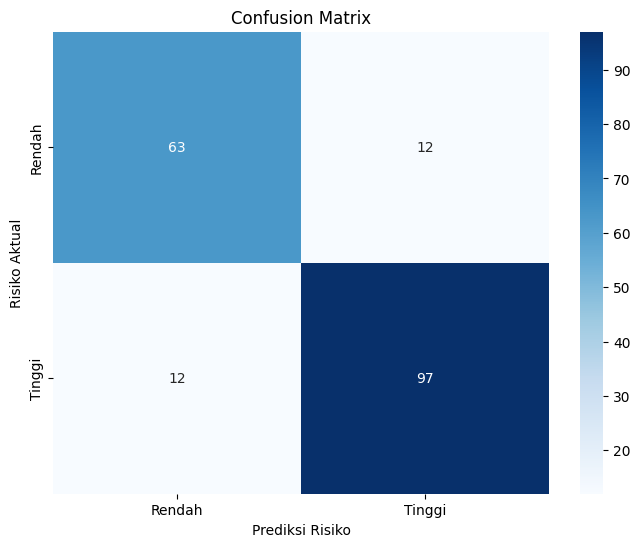

In [28]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Buat confusion matrix untuk visualisasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rendah', 'Tinggi'], yticklabels=['Rendah', 'Tinggi'])
plt.xlabel('Prediksi Risiko')
plt.ylabel('Risiko Aktual')
plt.title('Confusion Matrix')

# Pastikan folder 'static/images' ada
if not os.path.exists('../static/images'):
    os.makedirs('../static/images')

# Simpan gambar ke folder static agar bisa diakses oleh Flask
plt.savefig('../static/images/confusion_matrix.png')
print("\nGambar confusion matrix berhasil disimpan ke static/images/confusion_matrix.png")
plt.show()

In [30]:
# Pastikan folder 'save_model' ada di dalam direktori saat ini
if not os.path.exists('save_model'):
    os.makedirs('save_model')

# Simpan model yang sudah dilatih
pickle.dump(model, open('save_model/heart_disease_model.pkl', 'wb'))

# Simpan juga daftar kolom yang digunakan saat training
# Ini SANGAT PENTING untuk aplikasi Flask agar tidak ada error
pickle.dump(X.columns, open('save_model/model_columns.pkl', 'wb'))

print("Model dan daftar kolom berhasil disimpan di folder 'save_model/'")

Model dan daftar kolom berhasil disimpan di folder 'save_model/'
